In [1]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q -U datasets scipy ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
from google.colab import files
uploaded = files.upload()

Saving eval.json to eval.json


In [4]:
from datasets import load_dataset

train_dataset = load_dataset('json', data_files='/content/train-complex99.json', split='train')
print(train_dataset)
eval_dataset = load_dataset('json', data_files='/content/eval.json', split='train')
print(eval_dataset)

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['question', 'answer'],
    num_rows: 98
})


Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['question', 'answer'],
    num_rows: 9
})


In [5]:
def formatting_func(input):
  text = f"### Question: {input['question']}\n ### Answer: {input['answer']}"
  return text

In [6]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mixtral-8x7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/720 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/92.7k [00:00<?, ?B/s]

model-00001-of-00019.safetensors:   0%|          | 0.00/4.89G [00:00<?, ?B/s]

model-00002-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00005-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00006-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00007-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00008-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00009-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00010-of-00019.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00011-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:983: UserWarning: Not enough free disk space to download the file. The expected file size is: 4983.00 MB. The target location /root/.cache/huggingface/hub only has 482.44 MB free disk space.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:983: UserWarning: Not enough free disk space to download the file. The expected file size is: 4983.00 MB. The target location /root/.cache/huggingface/hub/models--mistralai--Mixtral-8x7B-v0.1/blobs only has 482.44 MB free disk space.
  warnings.warn(


model-00012-of-00019.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

OSError: [Errno 28] No space left on device

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token

def generate_and_tokenize_prompt(prompt):
    return tokenizer(formatting_func(prompt))

In [ ]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)
tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt)

158


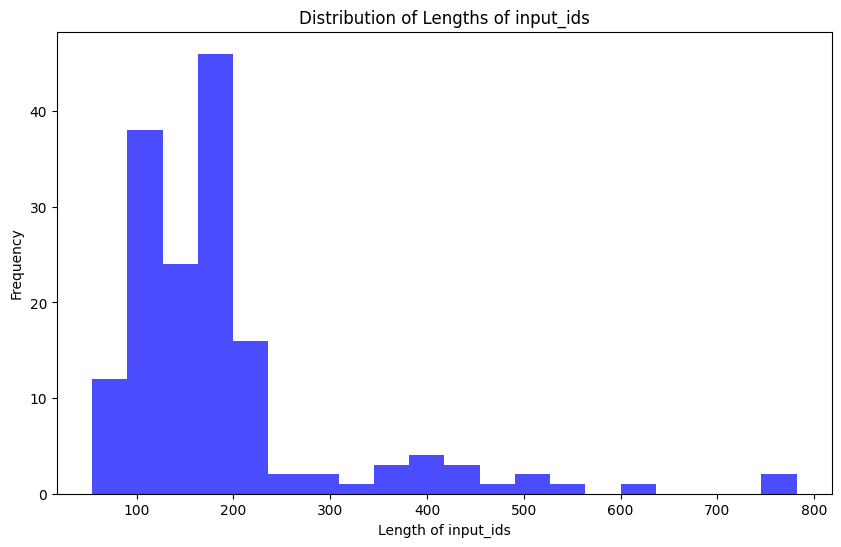

In [ ]:
import matplotlib.pyplot as plt

def plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset):
    lengths = [len(x['input_ids']) for x in tokenized_train_dataset]
    lengths += [len(x['input_ids']) for x in tokenized_val_dataset]
    print(len(lengths))

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of input_ids')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of input_ids')
    plt.show()

plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

In [ ]:
max_length = 650 # This was an appropriate max length for my dataset and I eyeballed it

def generate_and_tokenize_prompt2(prompt):
    result = tokenizer(
        formatting_func(prompt),
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )
    result["labels"] = result["input_ids"].copy()
    return result

In [ ]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt2)
tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt2)

Map:   0%|          | 0/149 [00:00<?, ? examples/s]

Map:   0%|          | 0/9 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_train_dataset[1]['input_ids'])

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

158


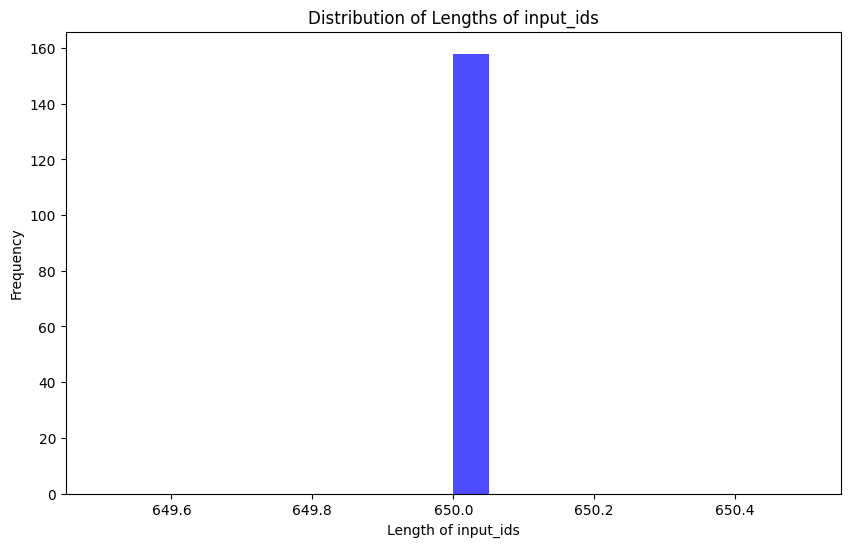

In [ ]:
plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

In [ ]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [ ]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

if __name__ == '__main__':
  print_trainable_parameters(model)

trainable params: 0 || all params: 3752071168 || trainable%: 0.0


In [ ]:
print(model)

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm()
        (post_attention_layernorm): MistralRMSNorm()
      )
    )
   

In [ ]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=32, # ola value = 32 - the higher r is the higher number of trainable parameters are
    lora_alpha=64, # old value = 64
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,  # Conventional
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

# with r  = 16 trainable params = 42520576, trainable%: 1.1205573318192514
# with r = 32 trainable params = 85041152, trainable%: 2.2162799758751914

trainable params: 85041152 || all params: 3837112320 || trainable%: 2.2162799758751914


In [ ]:
from accelerate import FullyShardedDataParallelPlugin, Accelerator
from torch.distributed.fsdp.fully_sharded_data_parallel import FullOptimStateDictConfig, FullStateDictConfig

fsdp_plugin = FullyShardedDataParallelPlugin(
    state_dict_config=FullStateDictConfig(offload_to_cpu=True, rank0_only=False),
    optim_state_dict_config=FullOptimStateDictConfig(offload_to_cpu=True, rank0_only=False),
)

accelerator = Accelerator(fsdp_plugin=fsdp_plugin)

In [ ]:
model = accelerator.prepare_model(model)

In [ ]:
!pip install -q wandb -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
import wandb, os
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
wandb_project = "gamaft-comparison-complex151"
if len(wandb_project) > 0:
    os.environ["WANDB_PROJECT"] = wandb_project

In [ ]:
if torch.cuda.device_count() > 1: # If more than 1 GPU
    model.is_parallelizable = True
    model.model_parallel = True

In [ ]:
import transformers
from datetime import datetime

project = "allblocks"
base_model_name = "mistral"
run_name = base_model_name + "-" + project
output_dir = "./" + run_name

'''
trainer = transformers.Trainer(
    model=model,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,
        gradient_checkpointing=True,
        max_steps=200,
        learning_rate=2.5e-5, # Want a small lr for finetuning
        fp16=True,
        optim="paged_adamw_8bit",
        logging_steps=5,              # When to start reporting loss
        logging_dir="./logs",        # Directory for storing logs
        save_strategy="steps",       # Save the model checkpoint every logging step
        save_steps=5,                # Save checkpoints every 50 steps
        evaluation_strategy="steps", # Evaluate the model every logging step
        eval_steps=5,               # Evaluate and save checkpoints every 50 steps
        do_eval=True,                # Perform evaluation at the end of training
        report_to="wandb",           # Comment this out if you don't want to use weights & baises
        run_name=f"{run_name}-{datetime.now().strftime('%Y-%m-%d-%H-%M')}"          # Name of the W&B run (optional)
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)
'''

trainer2 = transformers.Trainer(
    model=model,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,
        gradient_checkpointing=True,
        max_steps=250,
        learning_rate=5e-5, # Want a small lr for finetuning
        fp16=True,
        optim="paged_adamw_8bit",
        logging_steps=10,              # When to start reporting loss
        logging_dir="./logs",        # Directory for storing logs
        save_strategy="steps",       # Save the model checkpoint every logging step
        save_steps=10,                # Save checkpoints every 50 steps
        evaluation_strategy="steps", # Evaluate the model every logging step
        eval_steps=10,               # Evaluate and save checkpoints every 50 steps
        do_eval=True,                # Perform evaluation at the end of training
        report_to="wandb",           # Comment this out if you don't want to use weights & baises
        run_name=f"{run_name}-{datetime.now().strftime('%Y-%m-%d-%H-%M')}"          # Name of the W&B run (optional)
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

model.config.use_cache = False  # silence the warnings. Please re-enable for inference!

In [ ]:
trainer2.train()

wandb: Currently logged in as: phuonganhnn25-3 (7bmistral). Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss
10,1.441000,1.803587
20,0.775800,1.703908
30,0.573100,1.671319
40,0.555200,1.622131
50,0.493100,1.641618
60,0.361600,1.624619
70,0.300300,1.550915


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:131: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:131: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in

Step,Training Loss,Validation Loss
10,1.441000,1.803587
20,0.775800,1.703908
30,0.573100,1.671319
40,0.555200,1.622131
50,0.493100,1.641618
60,0.361600,1.624619
70,0.300300,1.550915
80,0.319800,1.584309
90,0.214200,1.634296
100,0.223300,1.580167


/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:131: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/peft/utils/save_and_load.py:131: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in

TrainOutput(global_step=250, training_loss=0.28308321118354796, metrics={'train_runtime': 1802.9526, 'train_samples_per_second': 0.277, 'train_steps_per_second': 0.139, 'total_flos': 1.39474277289984e+16, 'train_loss': 0.28308321118354796, 'epoch': 3.33})

In [ ]:
!pip install huggingface_hub

In [ ]:
!python -c "from huggingface_hub.hf_api import HfFolder; HfFolder.save_token('YOUR_TOKEN_HERE')"

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,  # Mistral, same as before
    quantization_config=bnb_config,  # Same quantization config as before
    device_map="auto",
    trust_remote_code=True,
    use_auth_token=True
)

eval_tokenizer2 = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py:472: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# test new dataset basic 52
from peft import PeftModel

# ft_model = PeftModel.from_pretrained(base_model, "mistral-gama-finetune_allblocks_newdata/checkpoint-45")
ft_model2 = PeftModel.from_pretrained(base_model, "mistral-gama-finetune_allblocks_newdata/checkpoint-220")
ft_model3 = PeftModel.from_pretrained(base_model, "mistral-gama-finetune_allblocks_newdata/checkpoint-250")
eval_prompt = "Create a GAML code snippet for a species named Human containing attributes like age and position alongside an initialization block and an action named Location"
model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model3.eval()
with torch.no_grad():
    print(eval_tokenizer.decode(ft_model3.generate(**model_input, max_new_tokens=700, repetition_penalty=1.15)[0], skip_special_tokens=True))

In [ ]:
# test new dataset complex 85
from peft import PeftModel

# ft_model = PeftModel.from_pretrained(base_model, "mistral-gama-finetune_allblocks_newdata/checkpoint-45")
ft_model2 = PeftModel.from_pretrained(base_model, "/content/mistral-allblocks/checkpoint-250")
#ft_model3 = PeftModel.from_pretrained(base_model, "mistral-allbloclks//checkpoint-250")

eval_prompt = "Create a GAML model name air_pollution to simulate air pollution in reality"
model_input = eval_tokenizer2(eval_prompt, return_tensors="pt").to("cuda")

#ft_model3.eval()
ft_model2.eval()
with torch.no_grad():
    print(eval_tokenizer2.decode(ft_model2.generate(**model_input, max_new_tokens=2000, repetition_penalty=1.15)[0], skip_special_tokens=True))
    print('----------------------------------------------------------------------')
    #print(eval_tokenizer.decode(ft_model2.generate(**model_input, max_new_tokens=2000, repetition_penalty=1.15)[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Create a GAML model name air_pollution to simulate air pollution in reality. The model should include species such as cars, trucks, buses, and factories that emit pollutants into the air. Pollutants should be spread throughout the environment based on their emission rates from these species. Additionally, people can be introduced into the model to represent those affected by air pollution.
 ### GAML code snippet for species: ```gaml
species {
    // Define species attributes here 
    
    // Define species actions here    
    
    // Define species behaviors here
}
```
### GAML code snippet for an experiment: ```gaml
experiment air_pollution type: gui {
    parameter "Initial number of cars: " var: nb_cars_init min: 1 max: 1000 category: "Cars";
    output {
        display main_display {
            species cars aspect: base;
            species people aspect: base;
        }
    }
}
```
### GAML code snippet for a species named "car": ```gaml
species car {
    float size <- 2.0;
  

In [ ]:
!pip install Flask
!pip install pyngrok

In [ ]:
from pyngrok import ngrok

# Replace 'your_authtoken' with the authtoken you obtained
ngrok.set_auth_token('2akilCfsmD8VDovNPbJqjIORcB8_62b63wLc3djr7Be2V28jv')

In [ ]:
from flask import Flask, render_template, request
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import PeftModel
from pyngrok import ngrok

app = Flask(__name__)
'''
base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

# Note: Uncomment this if you want to use the base_model

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True,
    use_auth_token=True
)
'''

ft_model = PeftModel.from_pretrained(base_model, "mistral-allblocks/checkpoint-250")

eval_tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True)

@app.route("/")
def home():
    return render_template("/content/index.html")

@app.route("/generate", methods=["POST"])
def generate():
    if request.method == "POST":
        prompt = request.form["prompt"]
        model_input = eval_tokenizer(prompt, return_tensors="pt").to("cuda")

        ft_model.eval()
        with torch.no_grad():
            generated_output = ft_model.generate(**model_input, max_new_tokens=700, repetition_penalty=1.15)[0]

        generated_text = eval_tokenizer.decode(generated_output, skip_special_tokens=True)

        return render_template("/content/index.html", prompt=prompt, generated_text=generated_text)

if __name__ == "__main__":
    public_url = ngrok.connect(8000)
    print(' * ngrok tunnel "http://127.0.0.1:8000" -> "{}"'.format(public_url))
    app.run(port=8000)
    #app.run(port=8000)


In [ ]:
!pip install -qU gradio

In [ ]:
import torch
import gradio as gr
from transformers import AutoTokenizer
from peft import PeftModel

# Load your base model

#base_model_id = "mistralai/Mistral-7B-v0.1"
#base_model = PeftModel.from_pretrained(base_model_id)

# Load the tokenizer
eval_tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True)

# Load your fine-tuned models

#ft_model = PeftModel.from_pretrained(base_model, "mistral-gama-finetune_allblocks/checkpoint-45")
#ft_model2 = PeftModel.from_pretrained(base_model, "mistral-gama-finetune_allblocks/checkpoint-90")
ft_model3 = PeftModel.from_pretrained(base_model, "mistral-allblocks/checkpoint-250")

# Define the Gradio process function
def generate_response(prompt):
    model_input = tokenizer(prompt, return_tensors="pt").to("cuda")

    # Generate responses using your fine-tuned models
    with torch.no_grad():
        #response1 = ft_model.generate(**model_input, max_new_tokens=700, repetition_penalty=1.15)[0]
        #response2 = ft_model2.generate(**model_input, max_new_tokens=700, repetition_penalty=1.15)[0]
        response3 = ft_model3.generate(**model_input, max_new_tokens=700, repetition_penalty=1.15)[0]

    # Decode the responses
    #decoded_response1 = tokenizer.decode(response1, skip_special_tokens=True)
    #decoded_response2 = tokenizer.decode(response2, skip_special_tokens=True)
    decoded_response3 = tokenizer.decode(response3, skip_special_tokens=True)

    return f"Response 3: {decoded_response3}"

# Create the Gradio interface
iface = gr.Interface(
    fn=generate_response,
    inputs=gr.Textbox(),
    outputs=gr.Textbox(),
    live=True,
    capture_session=True,
)

# Launch the Gradio interface
iface.launch(share=True)
